# Chp1_绪论 ---- 代码解读

### 题目1:  目标函数 𝑦=𝑠𝑖𝑛2𝜋𝑥, 加上一个正态分布的噪音干扰，用多项式去拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000) #这个用来画曲线
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_] #列表生成式


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    print(p_lsq)
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [ 21.8598551  -34.3172019   12.56223494  -0.24355203]
(array([ 21.8598551 , -34.3172019 ,  12.56223494,  -0.24355203]), 1)


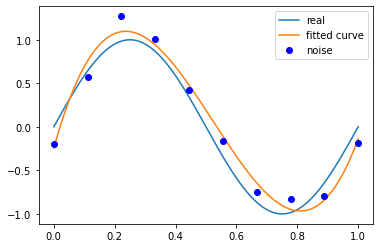

In [2]:
p_lsq_3 = fitting(M=3)

In [3]:
model = np.poly1d(p_lsq_3[0])
model(0)

-0.24355203152816265

### 代码解读笔记

```
1. scipy: 可以处理插值、积分、优化、图像处理、常微分方程数值解的求解、信号处理等

2. np.poly1d(p) # 返回一个1维多项式的函数
    p = np.poly1d([1, 2, 3])
    print(np.poly1d(p))
     => 1 x^2 + 2 x + 3
    p(0.5)
     => 4.25

　　参数1：为一个数组，若没有参数2，则生成一个多项式，例如：
　　　　　　p = np.poly1d([2,3,5,7])   
　　　　　　print(p)    ==>>2x^3 + 3x^2 + 5x + 7    
          数组中的数值为coefficient（系数），从后往前 0，1，2.。。为位置书的次数

   参数2：若参数2为True，则表示把数组中的值作为根，然后反推多项式，例如：
　　　　　　q = np.poly1d([2,3,5],True)
　　　　　　print(q)   ===>>(x - 2)*(x - 3)*(x - 5)  = x3 - 10x2 + 31x -30

　　参数3：variable=‘z’表示改变未知数的字母，例如：
　　　　　　q = np.poly1d([2,3,5],True,varibale = 'z')
　　　　　　print(q)   ===>>(z - 2)*(z - 3)*(z - 5)  = z3 - 10z2 + 31z -30
  
  多项式poly1d()的方法
　　　a.　　p(0.5)表示当x = 0.5时，多项式的值为多少
　　　b.　　p.r表示当多项式为 0 时，此等式的根
　　　c.　　p.c表示生成多项式的系数数组
　　　d.　　p.order表示返回最高项的次方数
　　　e.　　p[1]表示返回第一项的系数
　　　f.　　多项式支持实数的四则运算
   
3.leastsq(func, x0, args=())  #最小二乘法
  参数
    func : 残差函数
    x0   : 参数初始值
    args : 数据
  返回值
    值[0] 模型参数（高次->低次）

4. np.random.normal(mean, sd, size) #获取正态分布随机数，第三个参数默认为1
   np.random.rand(d0, d1, ..., dn) #参数可选，为维度，返回[0, 1)上均匀分布的随机数

5. plt.plot
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    >>> plot(x1, y1, 'g^', x2, y2, 'g-')
```

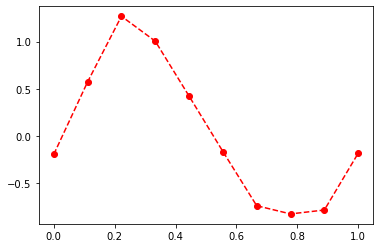

In [4]:
plt.plot(x, y, 'ro', linestyle = 'dashed') #画线和点

###  题目2: 对题目1中加入正则化项以防止过拟合

引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [6]:
def residuals_func_regularization(p, x, y, para):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
        np.sqrt(0.5 * para * np.square(p)))  # L2范数作为正则化项
    return ret

def plotting_result(label_content, y):
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, y, label=label_content)
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()

def plotting_all():
    fig=plt.figure(figsize=(20,7))
    for i in range(7):
        plt.subplot(2,4,i+1)
        label_content = "regu:" + str(regularizations[i])
        plt.plot(x_points, real_func(x_points), label='real')
        plt.plot(x_points, fit_result[i], label=label_content)
        plt.plot(x, y, 'bo', label='noise')
        plt.legend()       
    plt.subplot(2,4,8)
    label_content = "without_regu"
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label=label_content)
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()

regularizations = [0.000000000001, 0.0000000001, 0.00000001, 0.000001, 0.0001, 0.001, 0.01]
M = 9
p_init = np.random.rand(M + 1)
# 最小二乘法，不加正则化项
p_lsq_9 = leastsq(residuals_func, p_init, args=(x, y))
# 最小二乘法,加正则化项
fit_result = []
paras = []
for regu in regularizations: 
    p_lsq_regularization = leastsq(
        residuals_func_regularization, p_init, args=(x, y, regu))
    fit_result.append(fit_func(p_lsq_regularization[0], x_points))
    paras.append(p_lsq_regularization[0])

### 代码解读笔记

In [ ]:
a = np.array([1,2,3])
b = np.square(a)
print(b)
c = np.sqrt(b)
print(c)

### 不同正则化参数的结果

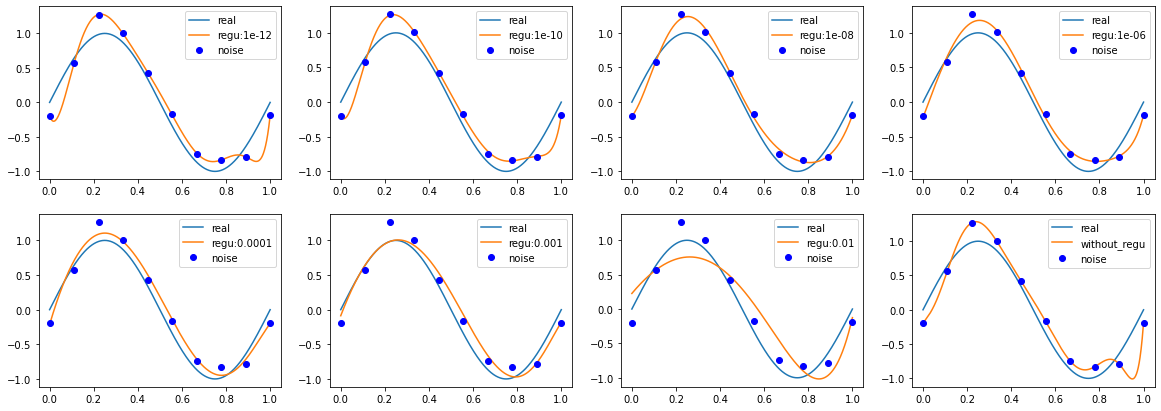

In [7]:
plotting_all()

In [12]:
for_print = np.round(np.array(paras),2)
for i in range(len(paras)):
    print("regu:",regularizations[i],"\n", for_print[i])
print("without regu:\n",p_lsq_9[0])

regu: 1e-12 
 [ 3.444160e+03 -1.217412e+04  1.571300e+04 -7.301150e+03 -2.152000e+03
  3.854930e+03 -1.657540e+03  2.814900e+02 -8.760000e+00 -2.000000e-01]
regu: 1e-10 
 [ 1.40921e+03 -4.36400e+03  3.84164e+03  1.57177e+03 -5.26861e+03
  4.06669e+03 -1.48930e+03  2.38510e+02 -5.91000e+00 -2.00000e-01]
regu: 1e-08 
 [-7.1180e+01  1.3411e+02  8.7400e+01 -2.3155e+02 -1.6862e+02  5.1739e+02
 -3.3356e+02  6.2200e+01  3.8300e+00 -2.0000e-01]
regu: 1e-06 
 [ 41.75 -30.36 -49.86 -12.95  54.12  63.47 -77.63   2.95   8.55  -0.22]
regu: 0.0001 
 [ -0.08  -3.78  -2.79   2.35   8.73   9.77  -2.99 -21.97  10.77  -0.21]
regu: 0.001 
 [ -4.27  -1.2    2.06   4.89   6.09   3.63  -4.6  -15.01   8.33  -0.09]
regu: 0.01 
 [-0.32  0.71  1.54  1.93  1.52 -0.16 -3.32 -6.09  3.84  0.23]
without regu:
 [ 9.98567542e+03 -4.16513395e+04  7.15132621e+04 -6.49286349e+04
  3.31071677e+04 -9.11308415e+03  1.10861834e+03 -2.62431564e+01
  4.58889191e+00 -1.97608200e-01]


### 正则化项的笔记

#### 1.定义见：统计学习23页

正则化项一般使用参数向量的范数。常用的有L1范数或L2范数， 分别称为L1正则化和L2正则化。

关于范数的定义参考： https://zhuanlan.zhihu.com/p/26884695

- L0正则化的值是模型参数中非零参数的个数。
- L1正则化是指权值向量w中各个元素的绝对值之和
- L2正则化是指权值向量w中各个元素的平方和然后再求平方根


#### 2.基本用途
对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）

- L1正则化：可以产生稀疏权值矩阵（即得到的线性回归模型的大部分系数都是0），即产生一个稀疏模型，可以用于特征选择（表示只有少数特征对这个模型有贡献，绝大部分特征是没有贡献的，或者贡献微小）
- L2正则化：可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合

内容参考：https://blog.csdn.net/jinping_shi/article/details/52433975


#### 3.为什么可以防止过拟合呢
博客1：https://www.cnblogs.com/jianxinzhou/p/4083921.html
因为它能将参数减小。在正则化里，我们要做的事情，就是把减小我们的代价函数（例子中是线性回归的代价函数）所有的参数值，因为我们并不知道是哪一个或哪几个要去缩小。

博客2: https://blog.csdn.net/qq_20412595/article/details/81636105
在该文中搜索“L2正则化项是怎么避免overfitting的呢”，后面还有图像上的理解 （重要）

#### 4.正则化参数
λ 要做的就是控制在两个不同的目标中的平衡关系。（目标1: 更好的拟合数据；目标2:减小参数，防过拟合）
- λ越大，参数越小，拟合越差，更倾向于满足目标2 ===> 容易欠拟合
- λ越小，参数越大，更倾向于满足目标1  ===> 容易过拟合

优化函数的目标变成了两个，w的取值不仅要使得L(w)的值最小，也要使得||w||的值最小。

如何选择λ的值，工程上一般采取交叉验证的方式来确定

- L2正则化对于绝对值较大的权重予以很重的惩罚，对于绝对值很小的权重予以非常非常小的惩罚，当权重绝对值趋近于0时，基本不惩罚（即越大的数，其平方越大，越小的数，比如小于1的数，其平方反而越小。）
- L1正则化对于所有权重予以同样的惩罚。较小的权重在被惩罚后，就会变成0

内容参考：https://www.cnblogs.com/jianxinzhou/p/4083921.html